In [1]:
import numpy as np
feats_file = 'D:/School/FARS/Dataset/Men/Men_bought_together/' + 'feats.npy'
node_features = np.load(feats_file)

In [2]:
node_features.shape
x=node_features
x
np.random.seed(1337)

In [3]:
from time import time
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling

In [6]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [7]:
x.shape
x = np.divide(x, 255.)
dims = [x.shape[-1],2048,1024,512,256]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.1, momentum=0.9)
pretrain_epochs = 100
batch_size = 256
save_dir = 'D:/School/FARS/Dataset/Men/Men_bought_together/'

In [8]:
autoencoder, encoder = autoencoder(dims, init=init)
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')

C:\Users\Malhi\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [9]:
autoencoder.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4096)]            0         
                                                                 
 encoder_0 (Dense)           (None, 2048)              8390656   
                                                                 
 encoder_1 (Dense)           (None, 1024)              2098176   
                                                                 
 encoder_2 (Dense)           (None, 512)               524800    
                                                                 
 encoder_3 (Dense)           (None, 256)               131328    
                                                                 
 decoder_3 (Dense)           (None, 512)               131584    
                                                                 
 decoder_2 (Dense)           (None, 1024)              525312   

In [10]:
history=autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs) #, callbacks=cb)

Epoch 1/100
119/119 [==============================] - 22s 182ms/step - loss: 4.2821e-10
Epoch 2/100
119/119 [==============================] - 22s 185ms/step - loss: 4.1411e-10
Epoch 3/100
119/119 [==============================] - 22s 181ms/step - loss: 4.0175e-10
Epoch 4/100
119/119 [==============================] - 23s 197ms/step - loss: 3.9104e-10
Epoch 5/100
119/119 [==============================] - 23s 197ms/step - loss: 3.8174e-10
Epoch 6/100
119/119 [==============================] - 24s 199ms/step - loss: 3.7365e-10
Epoch 7/100
119/119 [==============================] - 24s 199ms/step - loss: 3.6660e-10
Epoch 8/100
119/119 [==============================] - 24s 200ms/step - loss: 3.6044e-10
Epoch 9/100
119/119 [==============================] - 24s 200ms/step - loss: 3.5505e-10
Epoch 10/100
119/119 [==============================] - 23s 196ms/step - loss: 3.5033e-10
Epoch 11/100
119/119 [==============================] - 24s 200ms/step - loss: 3.4618e-10
Epoch 12/100
119/11

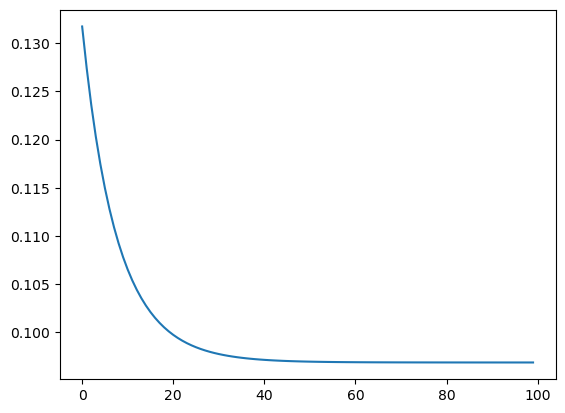

In [11]:
v=arr = np.array(history.history['loss'])
normalized_v = v / np.sqrt(np.sum(v**2))
from matplotlib import pyplot as plt
plt.plot(normalized_v)

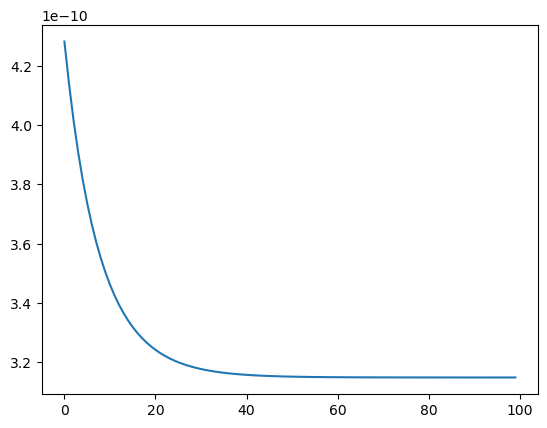

In [12]:
plt.plot(history.history['loss'])

In [13]:
autoencoder.save_weights(save_dir + '/ae_Men_bought_together.h5')
autoencoder.load_weights(save_dir + '/ae_Men_bought_together.h5')

In [14]:
x.shape

(30415, 4096)

In [15]:
history.history['loss']

[4.282121601750788e-10,
 4.141135212520908e-10,
 4.0175174298440197e-10,
 3.910391732642182e-10,
 3.8174319261230494e-10,
 3.7365391336585674e-10,
 3.6660210978034513e-10,
 3.604425091729979e-10,
 3.5505182127693047e-10,
 3.503295431528386e-10,
 3.4618433120137126e-10,
 3.425412731239419e-10,
 3.3933675314123946e-10,
 3.3651445519033985e-10,
 3.340261678363987e-10,
 3.318309238498074e-10,
 3.2989208587075325e-10,
 3.281791227660591e-10,
 3.2666475080489477e-10,
 3.2532532223683575e-10,
 3.241396040465361e-10,
 3.2308947184311876e-10,
 3.2216013190478066e-10,
 3.2133595784245017e-10,
 3.2060601395933475e-10,
 3.199582820911928e-10,
 3.1938388045382737e-10,
 3.188745933968562e-10,
 3.184220942475946e-10,
 3.180212482245537e-10,
 3.1766475561134655e-10,
 3.173483975604796e-10,
 3.1706715031276644e-10,
 3.168178774881625e-10,
 3.165963047280229e-10,
 3.1639924014115195e-10,
 3.162245743038028e-10,
 3.160691430803553e-10,
 3.1593117011397e-10,
 3.158083239362952e-10,
 3.156992445241258e-10,

In [16]:
predict_feats=encoder.predict(x)

951/951 [==============================] - 11s 11ms/step


In [17]:
predict_feats

array([[ 4.0491409e-07, -2.7079632e-06, -1.1253343e-06, ...,
         9.1429024e-07, -2.6799160e-07, -1.0717802e-06],
       [ 4.0057989e-07, -2.7907154e-06, -8.9341472e-07, ...,
         5.0256426e-07, -9.5399503e-07, -8.2945849e-07],
       [ 1.0758692e-06, -2.4361341e-06, -1.0731212e-07, ...,
         9.9476370e-07, -1.0075867e-07, -7.3100756e-07],
       ...,
       [ 4.0880309e-08, -1.8671370e-06, -4.2950649e-07, ...,
         9.4365419e-07,  1.2640697e-09, -7.3944562e-07],
       [ 8.5163248e-07, -3.0118363e-06, -1.7329853e-06, ...,
         1.6793217e-06,  6.4789464e-07, -2.3514760e-07],
       [ 1.4150044e-06, -2.6029197e-06,  5.5067147e-07, ...,
         1.4260316e-06, -2.9538779e-07, -1.3224701e-06]], dtype=float32)

In [18]:
predict_feats.shape

(30415, 256)

In [19]:
outfile = 'D:/School/FARS/Dataset/Men/Men_bought_together/' + 'deep_feats.npy'
np.save(outfile, predict_feats)

In [85]:
x_train = x.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [86]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00156863,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00609725, 0.        ,
        0.        ]], dtype=float32)

In [87]:
#note: x_train, x_train :) 
autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,)

Epoch 1/2
194/194 [==============================] - 6s 28ms/step - loss: 0.6931
Epoch 2/2
194/194 [==============================] - 6s 30ms/step - loss: 0.6931


In [88]:
encoded_imgs = encoder.predict(x)

1552/1552 [==============================] - 2s 1ms/step


In [91]:
encoded_imgs

array([[0.85907304, 0.        , 0.        , ..., 1.2691962 , 0.        ,
        0.        ],
       [0.        , 0.3308149 , 0.        , ..., 0.92131317, 4.0747538 ,
        0.7195615 ],
       [0.93763256, 1.0027614 , 0.        , ..., 2.1817882 , 0.15392062,
        0.        ],
       ...,
       [1.1867756 , 0.        , 0.15245122, ..., 0.        , 0.5030025 ,
        0.12496059],
       [1.7067939 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36680722, 0.        , 0.        , ..., 0.        , 1.8890053 ,
        0.        ]], dtype=float32)

In [95]:
arr = np.array(encoded_imgs)
  
arr

array([[0.85907304, 0.        , 0.        , ..., 1.2691962 , 0.        ,
        0.        ],
       [0.        , 0.3308149 , 0.        , ..., 0.92131317, 4.0747538 ,
        0.7195615 ],
       [0.93763256, 1.0027614 , 0.        , ..., 2.1817882 , 0.15392062,
        0.        ],
       ...,
       [1.1867756 , 0.        , 0.15245122, ..., 0.        , 0.5030025 ,
        0.12496059],
       [1.7067939 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36680722, 0.        , 0.        , ..., 0.        , 1.8890053 ,
        0.        ]], dtype=float32)

In [96]:
outfile = 'D:/School/PHD research/experiments/Dataset/Men_also_bought/' + 'deep_feats.npy'
np.save(outfile, arr)